In [5]:
# Импорт необходимых пакетов
import pandas as pd
import os
import re
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [5]:
# Пропишем относительный путь
path = os.getcwd()+'\\data\\'+os.listdir(os.getcwd()+'\\data')[0]

In [6]:
path

'C:\\Cluster_WorkSpace\\ML\\Makarenkov\\Belka\\data\\test_task_ab_Belka_Analytics.csv'

In [7]:
AB_data=pd.read_csv(path, sep=';')

In [8]:
# Приведем часть полей в тип str (в частности для того чтобы рассматривать их в качестве категориальных переменных)
AB_data['ab_group']=AB_data['ab_group'].astype(int).astype(str)
AB_data['uid']=AB_data['uid'].astype(int).astype(str)
AB_data['date']=AB_data['date'].astype(int) # удобно оставить в качестве int

In [118]:
AB_data.head()

,uid,date,revenue,play_time,ab_group,conversion
0,15375180,1,0.0,1070.0,1,0
1,15375268,1,0.0,1932.0,1,0
2,15375275,1,0.0,156.0,1,0
3,15375311,1,0.0,2943.0,1,0
4,15375560,1,0.0,3744.0,1,0


Далее проведем небольшой первичный анализ данных (EDA).
Попробуем рассмотреть данные в разных разрезах, построим графики, рассматрим корреляционные матрицы.
Ключевой момент в данном первичном анализе - распределения целевых метрик, которые оказались далеки от нормального.
P.S Можно промотать данный этап и перейте к проверке гипотез

In [119]:
#средние по сессиям
AB_data[['ab_group','revenue','play_time']].groupby(by='ab_group').mean()

,revenue,play_time
ab_group,,
1,0.164638,1979.915300
2,0.149179,1995.136241


In [120]:
#Посмотрим на описательные статистики
AB_data[['ab_group','revenue','play_time']].groupby(by='ab_group').describe()

play_time                                                      \
             count         mean          std    min      25%       50%   
ab_group                                                                 
1         384947.0  1979.915300  1458.721486  1.000  476.000  2096.000   
2         371366.0  1995.136241  1462.832892  0.953  509.855  2129.002   

                               revenue                                     \
               75%       max     count      mean       std  min  25%  50%   
ab_group                                                                    
1         3219.000  5052.000  384947.0  0.164638  7.770363  0.0  0.0  0.0   
2         3284.038  4819.321  371366.0  0.149179  7.323044  0.0  0.0  0.0   

                      
          75%    max  
ab_group              
1         0.0  500.0  
2         0.0  500.0

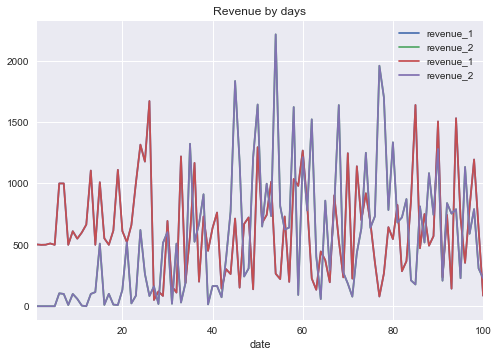

In [123]:
#график выручки по дням
AB_data[AB_data['ab_group']=='1'].groupby('date')['revenue'].sum().plot(legend=True,label='revenue_1')
AB_data[AB_data['ab_group']=='2'].groupby('date')['revenue'].sum().plot(legend=True,label='revenue_2', title='Revenue by days')
plt.show()

In [10]:
# Рассмотрим агрегацию по UID
AB_aggr=pd.DataFrame(AB_data.groupby(by=['uid','ab_group']).sum()).reset_index()

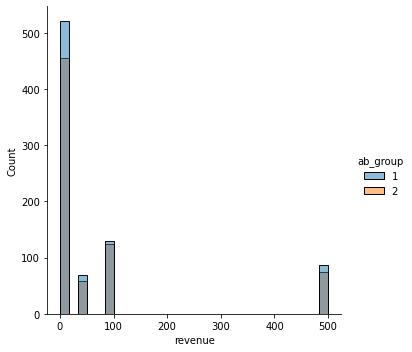

In [11]:
# График распределение средней выручки сессии с очситкой данных 
sns.displot(AB_data[AB_data['revenue']>0], x="revenue",hue="ab_group",bins=30)

In [12]:
AB_aggr.head()

,uid,ab_group,date,revenue,play_time
0,15375145,1,5014,0.0,184985.0
1,15375146,1,4522,0.0,141332.0
2,15375147,1,5040,124.0,183398.0
3,15375148,1,4879,0.0,167699.0
4,15375149,1,4015,0.0,102709.0


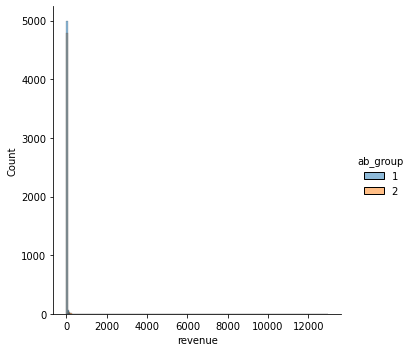

In [13]:
# График распределение средней выручки сессии 
sns.displot(AB_data, x="revenue",hue="ab_group",bins=200)

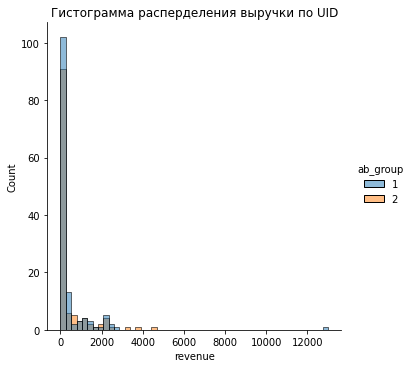

In [14]:
sns.displot(AB_aggr[AB_aggr['revenue']>0], x="revenue",hue="ab_group",bins=50).set(title='Гистограмма расперделения выручки по UID')

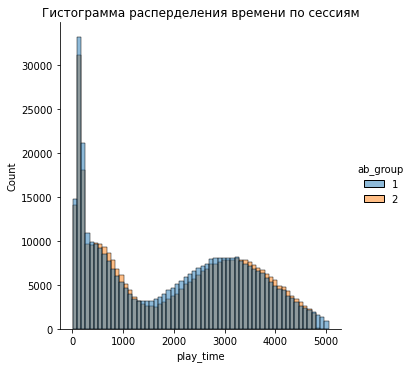

In [15]:
sns.displot(AB_data, x="play_time",hue="ab_group",bins=60).set(title='Гистограмма расперделения времени по сессиям')

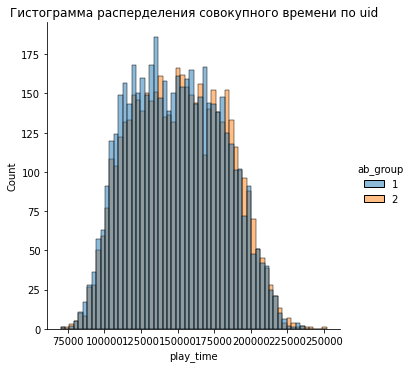

In [16]:
sns.displot(AB_aggr, x="play_time",hue="ab_group",bins=60).set(title='Гистограмма расперделения совокупного времени по uid')

In [17]:
AB_aggr.groupby(by='ab_group').describe()

date                                                            \
           count         mean         std     min      25%     50%     75%   
ab_group                                                                     
1         5110.0  4631.800783  368.825062  3825.0  4347.00  4725.0  4972.0   
2         4890.0  4643.586299  371.435939  3825.0  4356.25  4750.0  4984.0   

                 revenue             ...               play_time  \
             max   count       mean  ...  75%      max     count   
ab_group                             ...                           
1         5050.0  5110.0  12.402544  ...  0.0  13000.0    5110.0   
2         5050.0  4890.0  11.329243  ...  0.0   4550.0    4890.0   

                                                                           \
                   mean           std        min         25%          50%   
ab_group                                                                    
1         149151.165362  31200.016967  70862.000  123749.750  148473.5000   
2         151518.561370  31552.992177  70141.753  125942.762  151408.3515   

                                  
                 75%         max  
ab_group                          
1         173326.750  235458.000  
2         176569.934  251884.571  

[2 rows x 24 columns]

In [22]:
AB_aggr.corr()

,date,revenue,play_time
date,1.000000,0.002298,0.882111
revenue,0.002298,1.000000,0.009081
play_time,0.882111,0.009081,1.000000


In [23]:
AB_aggr[(AB_aggr['ab_group']=='1')].corr()

,date,revenue,play_time
date,1.000000,0.017558,0.882136
revenue,0.017558,1.000000,0.026297
play_time,0.882136,0.026297,1.000000


In [24]:
AB_aggr[(AB_aggr['ab_group']=='2')].corr()

,date,revenue,play_time
date,1.000000,-0.021612,0.882371
revenue,-0.021612,1.000000,-0.017232
play_time,0.882371,-0.017232,1.000000


Перейдем к статистическим тестам и проверке гипотез.
Из графиков выше можно заключить, что распредления целевых метрик не похожи на нормальные,
в связи с чем я решил не пользоваться наиболее популярным t-тестом, а использовать для проверки гипотез бутстрап.

Существует несколько альтернативных вариантов данной проблемы , однако каждый из них имеет свои недостатки:
Вариант 1: ранги
Самый популярный способ оценить эксперимент на двух ненормально распределенных выборках — это использовать 
непараметрические ранговые критерии. Один из них — критерий Манна-Уитни.
Однако интерпретация этого критерия не очень удобна
Вариант 2: трансформации
Мы можем попробовать использовать методы трансформации данных. 
Например, взять логарифм от выручки и посмотреть, что будет с распределением.
Но есть нюанс — теперь мы работаем не с метрикой, а с log-метрикой и все дальнейшие выводы будем делать на этом уровне.
Вывести из-под логарифма и оставить такой же вывод мы не можем, так как у нас изменится 
размерность данных и все описательные статистики. То есть второй метод нам тоже не подходит.
Вариант 3: чистка данных
Как стабилизировать данные, чтобы было проще сравнить средние при помощи критерия? Почистить данные.
Можем убрать все значения, которые выходят за N стандартных отклонений от среднего и воспринимать их как выбросы.
Отрезав эти выбросы, мы стабилизируем выборку, что позволит проще посчитать метрики.
Но в этом случае мы можем потерять большое количество наблюдений, что 
может сильно изменить результат эксперимента.Такой вариант нам тоже не подойдет.

Рассмотрим метрику времени
Гипотезы:
H0: mean(session_time_b)-mean(session_time_a)=0
H1: mean(session_time_b)-mean(session_time_a)<>0
Двусторонняя гипотеза

In [126]:
pickups_time_a=AB_data[AB_data['ab_group']=='1']['play_time']
pickups_time_b=AB_data[AB_data['ab_group']=='2']['play_time']


In [127]:
a_size=int(round(len(pickups_time_a)*0.1,0))
b_size=int(round(len(pickups_time_b)*0.1,0))

In [128]:
iters=10000

In [3]:
def bootstrap_diff(data_a,data_b,a_size,b_size,iterations):
    sample_props_a = []
    sample_props_b = []
    sample_diff=[]
    for _ in range(iterations):
        sample_a = np.random.choice(data_a, size=a_size)
        sample_props_a.append(sample_a.mean())
        sample_b = np.random.choice(data_b, size=b_size)
        sample_props_b.append(sample_b.mean())
        sample_diff.append(sample_a.mean()-sample_b.mean())
    simulated_mean_a = np.mean(sample_props_a)
    simulated_mean_b = np.mean(sample_props_b)
    simulated_mean_diff = np.mean(sample_diff)
    simulated_std_a = np.std(sample_props_a)
    simulated_std_b = np.std(sample_props_b)
    simulated_std_diff = np.std(simulated_mean_diff)    
    return sample_props_a,simulated_mean_a,simulated_std_a,sample_props_b,simulated_mean_b,simulated_std_b,sample_diff,simulated_mean_diff,simulated_std_diff

In [130]:
time_a_means,a_time_mean,a_time_std,time_b_means,b_time_mean,b_time_std,time_diff_means,diff_mean_time,diff_time_std=bootstrap_diff(pickups_time_a,pickups_time_b,a_size,b_size,iters)

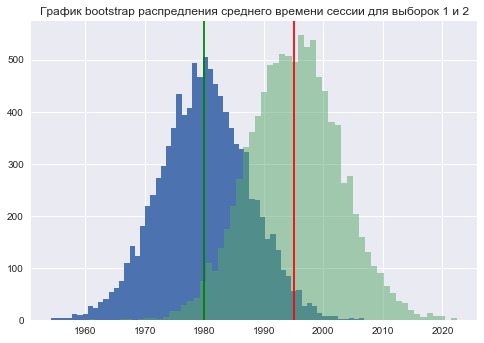

In [133]:
plt.hist(time_a_means,bins=60)
plt.hist(time_b_means,bins=60,alpha=0.5)
plt.title('График bootstrap распредления среднего времени сессии для выборок 1 и 2')
plt.axvline(a_time_mean, color='green')
plt.axvline(b_time_mean, color='red')
plt.show()

In [134]:
# Посмотрим на теоретические средние и средние полученые в ходе симуляции по выборка 
print(f'Для выборки А:{(pickups_time_a.mean(), a_time_mean)}')
print(f'Для выборки B:{(pickups_time_b.mean(), b_time_mean)}')

Для выборки А:(1979.9153000283156, 1979.980986247565)
Для выборки B:(1995.136240528218, 1995.1203947020088)


In [135]:
# Аналогично рассмотрим теоритечкие и симулированные стандартные отклонения
print(f'Для выборки А:{(pickups_time_a.std()/(a_size ** 0.5), a_time_std)}')
print(f'Для выборки B:{(pickups_time_b.std()/(b_size ** 0.5), b_time_std)}')

Для выборки А:(7.434815881885382, 7.48621567950039)
Для выборки B:(7.590865703070589, 7.570287834003135)


In [136]:
diff_means_shifted = time_diff_means - diff_mean_time - 0

In [137]:
emp_diff_means = pickups_time_b.mean() - pickups_time_a.mean() 

In [138]:
emp_diff_pctile_rnk = stats.percentileofscore(diff_means_shifted, emp_diff_means)

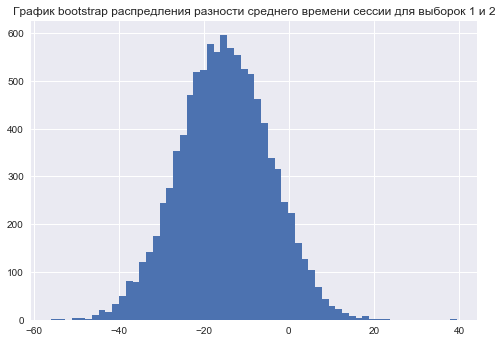

In [139]:
plt.hist(time_diff_means,bins=60)
plt.title('График bootstrap распредления разности среднего времени сессии для выборок 1 и 2')
plt.show()

In [140]:
auc_left = round(emp_diff_pctile_rnk / 100, 4)
auc_rght = round(1 - emp_diff_pctile_rnk / 100, 4)
print(f'Разность эмпирических значений средних двух выборок: {round(emp_diff_means, 3)}')
print(f'AUC to the left: {auc_left}')
print(f'AUC to the right: {auc_rght}')

Разность эмпирических значений средних двух выборок: 15.221
AUC to the left: 0.9219
AUC to the right: 0.0781


In [141]:
auc_tail = auc_left if auc_left < auc_rght else auc_rght
p_val = round(auc_tail * 2, 4)
print("P-value:", p_val)

P-value: 0.1562


In [142]:
print(f'Не можем отклонить нулевую гипотезу при 90% уровне значимости так как p_val={p_val}>0.10.')

Не можем отклонить нулевую гипотезу при 90% уровне значимости так как p_val=0.1562>0.10.


Рассмотрим метрику средней выручки за сессию
Гипотезы:
H0: mean(session_revenue_b)-mean(session_revenue_a)=0
H1: mean(session_revenue_b)-mean(session_revenue_a)<>0
Двусторонняя гипотеза

In [143]:
pickups_revenue_a=AB_data[AB_data['ab_group']=='1']['revenue']
pickups_revenue_b=AB_data[AB_data['ab_group']=='2']['revenue']

In [144]:
a_size=int(round(len(pickups_revenue_a)*0.1,0))
b_size=int(round(len(pickups_revenue_b)*0.1,0))

In [145]:
revenue_a_means,a_revenue_mean,a_revenue_std,revenue_b_means,b_revenue_mean,b_revenue_std,revenue_diff_means,diff_mean_revenue,diff_revenue_std=bootstrap_diff(pickups_revenue_a,pickups_revenue_b,a_size,b_size,iters)

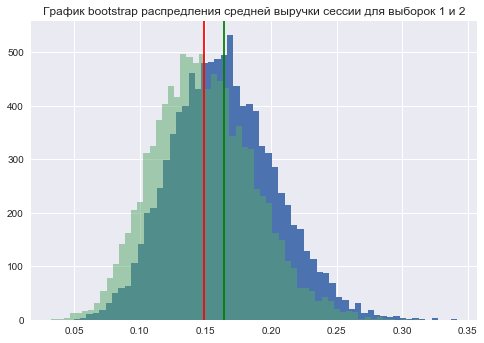

In [146]:
plt.hist(revenue_a_means,bins=60)
plt.hist(revenue_b_means,bins=60,alpha=0.5)
plt.title('График bootstrap распредления средней выручки сессии для выборок 1 и 2')
plt.axvline(a_revenue_mean, color='green')
plt.axvline(b_revenue_mean, color='red')
plt.show()

In [147]:
# Посмотрим на теоретические средние и средние полученые в ходе симуляции по выборка 
print(f'Для выборки А:{(pickups_revenue_a.mean(), a_revenue_mean)}')
print(f'Для выборки B:{(pickups_revenue_b.mean(), b_revenue_mean)}')

Для выборки А:(0.16463824890179687, 0.16419841797636056)
Для выборки B:(0.14917897707383013, 0.14895219053773864)


In [148]:
# Аналогично рассмотрим теоритечкие и симулированные стандартные отклонения
print(f'Для выборки А:{(pickups_revenue_a.std()/(a_size ** 0.5), a_revenue_std)}')
print(f'Для выборки B:{(pickups_revenue_b.std()/(b_size ** 0.5), b_revenue_std)}')

Для выборки А:(0.0396040109683316, 0.03948827720077032)
Для выборки B:(0.038000408213550635, 0.03809975949743797)


In [149]:
diff_means_shifted = revenue_diff_means - diff_mean_revenue - 0

In [150]:
emp_diff_means = pickups_revenue_b.mean() - pickups_revenue_a.mean() 

In [151]:
emp_diff_pctile_rnk = stats.percentileofscore(diff_means_shifted, emp_diff_means)

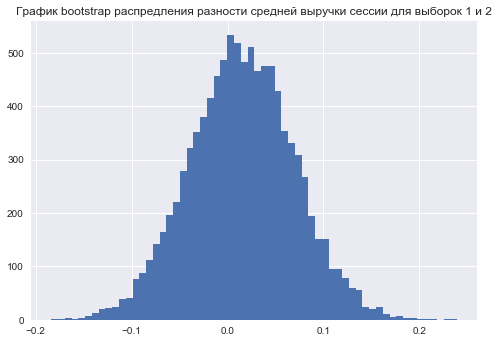

In [152]:
plt.hist(revenue_diff_means,bins=60)
plt.title('График bootstrap распредления разности средней выручки сессии для выборок 1 и 2')
plt.show()

In [153]:
auc_left = round(emp_diff_pctile_rnk / 100, 4)
auc_rght = round(1 - emp_diff_pctile_rnk / 100, 4)
print(f'Разность эмпирических значений средних двух выборок: {round(emp_diff_means, 3)}')
print(f'AUC to the left: {auc_left}')
print(f'AUC to the right: {auc_rght}')

Разность эмпирических значений средних двух выборок: -0.015
AUC to the left: 0.3872
AUC to the right: 0.6128


In [154]:
auc_tail = auc_left if auc_left < auc_rght else auc_rght
p_val = round(auc_tail * 2, 4)
print("P-value:", p_val)

P-value: 0.7744


In [155]:
print(f'Не можем отклонить нулевую гипотезу при 90% уровне значимости так как p_val={p_val}>0.10.')

Не можем отклонить нулевую гипотезу при 90% уровне значимости так как p_val=0.7744>0.10.


Рассмотрим метрику доли платящих пользователей 
Гипотезы:
H0: mean(percent_paid_b)-mean(percent_paid_a)=0
H1: mean(percent_paid_b)-mean(percent_paid_a)<>0
Двусторонняя гипотеза

In [156]:
AB_conversion=AB_data[['uid','ab_group','revenue']].groupby(by=['uid','ab_group']).sum().reset_index()
AB_conversion['paid']=np.where(AB_conversion['revenue'] > 0, 1, 0)
AB_conversion.head()

,uid,ab_group,revenue,paid
0,15375145,1,0.0,0
1,15375146,1,0.0,0
2,15375147,1,124.0,1
3,15375148,1,0.0,0
4,15375149,1,0.0,0


In [157]:
percent_a=round(AB_conversion[AB_conversion['ab_group']=='1']['paid'].sum()/AB_conversion[AB_conversion['ab_group']=='1'].shape[0]*100,3)
percent_b=round(AB_conversion[AB_conversion['ab_group']=='2']['paid'].sum()/AB_conversion[AB_conversion['ab_group']=='2'].shape[0]*100,3)
print(f'Процент платящих игроков в группе 1:{percent_a}% Процент платящих игроков в группе 2:{percent_b}%')

Процент платящих игроков в группе 1:2.701% Процент платящих игроков в группе 2:2.495%


In [158]:
emp_diff=round(percent_b-percent_a,3)

In [159]:
a_size=int(round(AB_conversion[AB_conversion['ab_group']=='1'].shape[0]*0.1,0))
b_size=int(round(AB_conversion[AB_conversion['ab_group']=='2'].shape[0]*0.1,0))

In [160]:
iters=100000

In [161]:
def bootstrap_diff_ratios(data_a,data_b,a_size,b_size,iterations):
    sample_props_a = []
    sample_props_b = []
    sample_diff=[]
    for _ in range(iterations):
        sample_a = np.random.choice(data_a, size=a_size)
        a_ratio=round(len(sample_a[sample_a>0])/a_size*100,3)
        sample_props_a.append(a_ratio)        
        sample_b = np.random.choice(data_b, size=b_size)
        b_ratio=round(len(sample_b[sample_b>0])/b_size*100,3)
        sample_props_b.append(round(len(sample_b[sample_b>0])/b_size*100,3))
        sample_diff.append(b_ratio-a_ratio)
    simulated_mean_a = np.mean(sample_props_a)
    simulated_mean_b = np.mean(sample_props_b)
    simulated_mean_diff = np.mean(sample_diff)
    simulated_std_a = np.std(sample_props_a)
    simulated_std_b = np.std(sample_props_b)
    simulated_std_diff = np.std(simulated_mean_diff)    
    return sample_props_a,simulated_mean_a,simulated_std_a,sample_props_b,simulated_mean_b,simulated_std_b,sample_diff,simulated_mean_diff,simulated_std_diff

In [162]:
ratio_a_means,a_ratio_mean,a_ratio_std,ratio_b_means,b_ratio_mean,b_ratio_std,ratio_diff_means,diff_mean_ratio,diff_ratio_std=bootstrap_diff_ratios(data_a,data_b,a_size,b_size,iters)

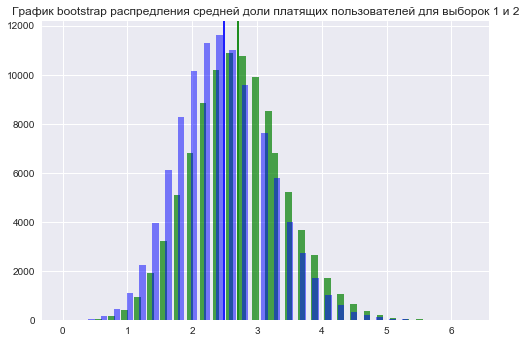

In [163]:
plt.hist(ratio_a_means,bins=60,alpha=0.7,rwidth=1,color='green')
plt.hist(ratio_b_means,bins=60,alpha=0.5,rwidth=1,color='blue')
plt.title('График bootstrap распредления средней доли платящих пользователей для выборок 1 и 2')
plt.axvline(a_ratio_mean, color='green')
plt.axvline(b_ratio_mean, color='blue')
plt.show()

In [164]:
# Посмотрим на теоретические средние и средние полученые в ходе симуляции по выборка 
print(f'Для выборки А:{(data_a.mean()*100, a_ratio_mean)}')
print(f'Для выборки B:{(data_b.mean()*100, b_ratio_mean)}')

Для выборки А:(2.700587084148728, 2.70097963)
Для выборки B:(2.494887525562372, 2.49221913)


In [165]:
# Аналогично рассмотрим теоритечкие и симулированные стандартные отклонения
print(f'Для выборки А:{(data_a.std()/(a_size ** 0.5)*100, a_ratio_std)}')
print(f'Для выборки B:{(data_b.std()/(b_size ** 0.5)*100, b_ratio_std)}')

Для выборки А:(0.7171603189718958, 0.7171498355121217)
Для выборки B:(0.705389776462395, 0.7034960852997286)


In [166]:
diff_means_shifted = ratio_diff_means - diff_mean_ratio - 0

In [167]:
emp_diff_pctile_rnk = stats.percentileofscore(diff_means_shifted, emp_diff)

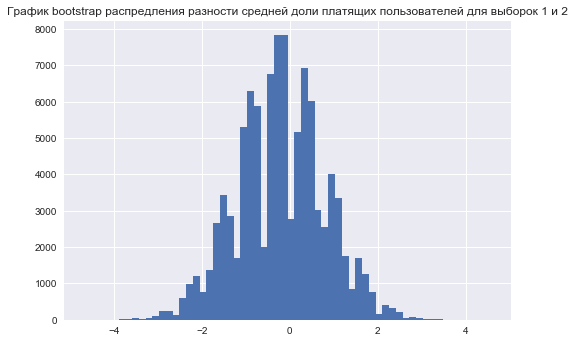

In [168]:
plt.hist(ratio_diff_means,bins=60)
plt.title('График bootstrap распредления разности средней доли платящих пользователей для выборок 1 и 2')
plt.show()

In [169]:
auc_left = round(emp_diff_pctile_rnk / 100, 4)
auc_rght = round(1 - emp_diff_pctile_rnk / 100, 4)
print(f'Разность эмпирических значений средних двух выборок: {round(emp_diff, 3)}')
print(f'AUC to the left: {auc_left}')
print(f'AUC to the right: {auc_rght}')

Разность эмпирических значений средних двух выборок: -0.206
AUC to the left: 0.4276
AUC to the right: 0.5724


In [170]:
auc_tail = auc_left if auc_left < auc_rght else auc_rght
p_val = round(auc_tail * 2, 4)
print("P-value:", p_val)

P-value: 0.8552


In [171]:
print(f'Не можем отклонить нулевую гипотезу при 90% уровне значимости так как p_val={p_val}>0.10.')

Не можем отклонить нулевую гипотезу при 90% уровне значимости так как p_val=0.8552>0.10.


Для ответа на вопрос касательно остановки эксперимента рассмотрим динамику доли платящих пользователей. 
В данном ключе я рассматриваю динамику этой доли в качестве динамики конверсии.
Из графика можно сделать вывод, что доля платящих пользователей сходится для групп 1 и 2 ,т.е графики колеблются примерно на одном уровне, следовательно можно заключить, что накапливавть доп данные не имеет особого смысла (если динамика была бы расходящейся или были явно видны какие-либо сезонные эффекты я бы задумался над продложением эксперимента).

Стоило ли останавливать эксперимент раньше ?
Мне было комфортно работать с теми объемами выборки, которые были представлены.
Возможно его можно было остановить раньше, однако с точки зрения проведения стат.тестов, объемы выборок позволяют сделать статистически значимые выводы.

In [172]:
AB_data_conversions=AB_data[['date','ab_group','uid','revenue']].groupby(['date','ab_group','uid']).sum().reset_index()
AB_data_conversions['conversion'] = np.where(AB_data['revenue'] > 0, 1, 0)
AB_data_conversions=AB_data.groupby(['date','ab_group'],as_index=False).agg({'uid':['count'], 
                         'conversion':'sum'})
AB_data_conversions.columns= AB_data_conversions.columns.droplevel(-1)
AB_data_conversions.rename(columns = {'uid': 'unique_users', 'conversion': 'sum_conversions'}, inplace = True)
AB_data_conversions['conversion_rate']=AB_data_conversions['sum_conversions']/AB_data_conversions['unique_users']*100
AB_data_conversions.set_index('date')
AB_data_conversions.head(10)

,date,ab_group,unique_users,sum_conversions,conversion_rate
0,1,1,112,2,1.785714
1,1,2,107,0,0.000000
2,2,1,204,1,0.490196
3,2,2,205,0,0.000000
4,3,1,297,2,0.673401
5,3,2,310,0,0.000000
6,4,1,383,3,0.783290
7,4,2,406,0,0.000000
8,5,1,474,1,0.210970
9,5,2,519,0,0.000000


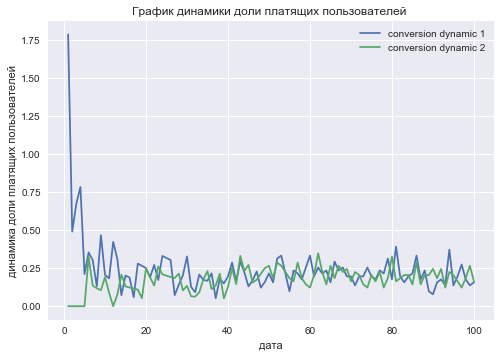

In [173]:
y1=AB_data_conversions[AB_data_conversions['ab_group']=='1']['conversion_rate']
y2=AB_data_conversions[AB_data_conversions['ab_group']=='2']['conversion_rate']
x=AB_data_conversions[AB_data_conversions['ab_group']=='2']['date']
plt.plot(x, y1, label = "conversion dynamic 1")
plt.plot(x, y2, label = "conversion dynamic 2")
plt.xlabel('дата')
plt.ylabel('динамика доли платящих пользователей')
plt.title('График динамики доли платящих пользователей ')
plt.legend()
plt.show()

In [188]:
print('Ответы на вопросы:')
print('Ответ1:')
print (f'{round(pickups_time_b.mean() - pickups_time_a.mean(),3)} - разность среднего времени сессии для выборок 1 и 2') 
print (f'{round(pickups_revenue_b.mean() - pickups_revenue_a.mean(),3)} - разность средней выручки сессии для выборок 1 и 2')
print (f'{round(percent_b-percent_a,3)}- разность доли платящих пользователей для выборок 1 и 2 ')
print('Ответ2:')
print('Статистическая значимость не позволила отвергнуть ни одну гипотезу на 90% уровне значимости')
print('Ответ3:')
print('Исходя из стат. тестов внердрение новой кривой сложности не приводит к заметным эффектам')
print('Ответ4:')
print('На мой взгляд интересный фактор в данных - это распределение средней выручки сессии, которое явно указывает \nна то что игра F2P, так очень большое количество сессий не приности выручки.\nТакже меня смутило бимодальное распределение среднего времени сессии')
print('Ответ5:')
print ('Для ответа на вопрос касательно остановки эксперимента рассмотрим динамику доли \nплатящих пользователей. В данном ключе я рассматриваю динамику этой доли в качестве динамики конверсии. Из графика можно сделать вывод, что \nдоля платящих пользователей сходится для групп 1 и 2 ,т.е графики колеблются примерно на одном уровне, следовательно можно заключить, что накапливавть доп данные \nне имеет особого смысла (если динамика была бы расходящейся или были явно видны какие-либо сезонные эффекты я бы задумался над продложением эксперимента).\nСтоило ли останавливать эксперимент раньше ? Мне было комфортно работать с теми объемами выборки, которые были представлены. Возможно его можно было остановить раньше, \nоднако с точки зрения проведения стат.тестов, объемы выборок позволяют сделать статистически значимые выводы.')

Ответы на вопросы:
Ответ1:
15.221 - разность среднего времени сессии для выборок 1 и 2
-0.015 - разность средней выручки сессии для выборок 1 и 2
-0.206- разность доли платящих пользователей для выборок 1 и 2 
Ответ2:
Статистическая значимость не позволила отвергнуть ни одну гипотезу на 90% уровне значимости
Ответ3:
Исходя из стат. тестов внердрение новой кривой сложности не приводит к заметным эффектам
Ответ4:
На мой взгляд интересный фактор в данных - это распределение средней выручки сессии, которое явно указывает 
на то что игра F2P, так очень большое количество сессий не приности выручки.
Также меня смутило бимодальное распределение среднего времени сессии
Ответ5:
Для ответа на вопрос касательно остановки эксперимента рассмотрим динамику доли 
платящих пользователей. В данном ключе я рассматриваю динамику этой доли в качестве динамики конверсии. Из графика можно сделать вывод, что 
доля платящих пользователей сходится для групп 1 и 2 ,т.е графики колеблются примерно на одном уровн

P.S 
1) Мне откровенно не понравилось распрделение разности долей платящих пользователей , возможно 
данную метрику следовало бы исследовать более детально
2)Если бы было чуть больше времени я бы также провел Permutation-test , для проверки гипотезы о том что обе выборки 
имеют идентичным параметры. 